In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("48_Lev_corr_Temp_fault_seed_199_vars_23.csv")

In [3]:
df

,Time,RT_level_ini,DANGER,FAULT,RT_temperature.T,HT_temperature.T,RT_level,out_valve_act,dT_rand,inv_valve_act,...,boundary.m_flow_in,dir_valve_act,dt_rand,C_level,C_temperature.T,heater_act,HT_level,ATTACK,limiter1.y,dL_rand
0,0.0,0.0,0.0,0.0,283.149994,283.149994,0.500000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.100000,0.0,100.000000,0.000000
1,1.0,0.0,0.0,0.0,283.149994,283.163330,0.500000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.100000,0.0,100.000000,0.000000
2,2.0,0.0,0.0,0.0,283.149994,283.176666,0.500000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.100000,0.0,100.000000,0.000000
3,3.0,0.0,0.0,0.0,283.149994,283.189972,0.500000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.100000,0.0,100.000000,0.000000
4,4.0,0.0,0.0,0.0,283.149994,283.203247,0.500000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.100000,0.0,100.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204613,199997.0,2.7,0.0,0.0,311.282806,326.177246,2.688000,0.0,1.058382,0.0,...,0.0,1.0,-0.912534,1.793499,330.057159,0.0,0.112000,0.0,90.874657,1.058382
204614,199998.0,2.7,0.0,0.0,311.282806,323.609467,2.664904,0.0,1.058382,0.0,...,0.0,1.0,-0.912534,1.793499,330.057159,0.0,0.135096,0.0,90.874657,1.058382
204615,199999.0,2.7,0.0,0.0,311.282806,321.792908,2.641813,0.0,1.058382,0.0,...,0.0,1.0,-0.912534,1.793499,330.057159,0.0,0.158187,0.0,90.874657,1.058382
204616,200000.0,2.7,0.0,0.0,311.282806,320.440308,2.618726,0.0,1.058382,0.0,...,0.0,1.0,-0.912534,1.793499,330.057159,0.0,0.181274,0.0,90.874657,1.058382


In [4]:
df.iloc[0]

Time                    0.000000
RT_level_ini            0.000000
DANGER                  0.000000
FAULT                   0.000000
RT_temperature.T      283.149994
HT_temperature.T      283.149994
RT_level                0.500000
out_valve_act           0.000000
dT_rand                 0.000000
inv_valve_act           0.000000
limiter.y             283.000000
inj_valve_act           0.000000
Relaxing.active         0.000000
boundary.m_flow_in      0.000000
dir_valve_act           0.000000
dt_rand                 0.000000
C_level                 0.010000
C_temperature.T       273.149994
heater_act              0.000000
HT_level                0.100000
ATTACK                  0.000000
limiter1.y            100.000000
dL_rand                 0.000000
Name: 0, dtype: float64

Посмотрим есть ли повторяющиеся значения времени

In [5]:
count=0
for i in df["Time"].duplicated():
    if i == True:
        count+=1
print(count)

2992


Посмотрим есть ли пропуски

In [6]:
count=1
for i in df["Time"].isnull():
    if i == True:
        count+=1
print(count)

1


Удалим дубликаты

In [7]:
df1 = df.drop_duplicates(keep = False, subset = ["Time"])

In [8]:
df1

,Time,RT_level_ini,DANGER,FAULT,RT_temperature.T,HT_temperature.T,RT_level,out_valve_act,dT_rand,inv_valve_act,...,boundary.m_flow_in,dir_valve_act,dt_rand,C_level,C_temperature.T,heater_act,HT_level,ATTACK,limiter1.y,dL_rand
0,0.0,0.0,0.0,0.0,283.149994,283.149994,0.500000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.100000,0.0,100.000000,0.000000
1,1.0,0.0,0.0,0.0,283.149994,283.163330,0.500000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.100000,0.0,100.000000,0.000000
2,2.0,0.0,0.0,0.0,283.149994,283.176666,0.500000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.100000,0.0,100.000000,0.000000
3,3.0,0.0,0.0,0.0,283.149994,283.189972,0.500000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.100000,0.0,100.000000,0.000000
4,4.0,0.0,0.0,0.0,283.149994,283.203247,0.500000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.100000,0.0,100.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204607,199995.0,2.7,0.0,0.0,311.282806,328.050201,2.700000,0.0,1.058382,0.0,...,0.0,0.0,-0.912534,1.793499,330.057159,0.0,0.100000,0.0,90.874657,1.058382
204608,199996.0,2.7,0.0,0.0,311.282806,328.003632,2.700000,0.0,1.058382,0.0,...,0.0,0.0,-0.912534,1.793499,330.057159,0.0,0.100000,0.0,90.874657,1.058382
204613,199997.0,2.7,0.0,0.0,311.282806,326.177246,2.688000,0.0,1.058382,0.0,...,0.0,1.0,-0.912534,1.793499,330.057159,0.0,0.112000,0.0,90.874657,1.058382
204614,199998.0,2.7,0.0,0.0,311.282806,323.609467,2.664904,0.0,1.058382,0.0,...,0.0,1.0,-0.912534,1.793499,330.057159,0.0,0.135096,0.0,90.874657,1.058382


Проверим есть ли теперь дубликаты

In [9]:
count=0
for i in df1["Time"].duplicated():
    if i == True:
        count+=1
print(count)

0


In [10]:
df1 = df1.reset_index(drop=True)

In [11]:
from datetime import datetime

In [12]:
for i in df1["Time"]:
    df1["Time"][i] = datetime.fromtimestamp(i).strftime("%Y-%m-%d %I:%M:%S")

C:\Users\PC\AppData\Local\Temp\ipykernel_16516\2967639336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Time"][i] = datetime.fromtimestamp(i).strftime("%Y-%m-%d %I:%M:%S")
C:\Users\PC\AppData\Local\Temp\ipykernel_16516\2967639336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Time"][i] = datetime.fromtimestamp(i).strftime("%Y-%m-%d %I:%M:%S")
C:\Users\PC\AppData\Local\Temp\ipykernel_16516\2967639336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [13]:
df1.head()

,Time,RT_level_ini,DANGER,FAULT,RT_temperature.T,HT_temperature.T,RT_level,out_valve_act,dT_rand,inv_valve_act,...,boundary.m_flow_in,dir_valve_act,dt_rand,C_level,C_temperature.T,heater_act,HT_level,ATTACK,limiter1.y,dL_rand
0,1970-01-01 03:00:00,0.0,0.0,0.0,283.149994,283.149994,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.01,273.149994,0.0,0.1,0.0,100.0,0.0
1,1970-01-01 03:00:01,0.0,0.0,0.0,283.149994,283.163330,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.01,273.149994,0.0,0.1,0.0,100.0,0.0
2,1970-01-01 03:00:02,0.0,0.0,0.0,283.149994,283.176666,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.01,273.149994,0.0,0.1,0.0,100.0,0.0
3,1970-01-01 03:00:03,0.0,0.0,0.0,283.149994,283.189972,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.01,273.149994,0.0,0.1,0.0,100.0,0.0
4,1970-01-01 03:00:04,0.0,0.0,0.0,283.149994,283.203247,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.01,273.149994,0.0,0.1,0.0,100.0,0.0


In [14]:
df1['Time'] = df1['Time'].astype('datetime64[ns]')

In [15]:
df1['Time'] 

0        1970-01-01 03:00:00
1        1970-01-01 03:00:01
2        1970-01-01 03:00:02
3        1970-01-01 03:00:03
4        1970-01-01 03:00:04
                 ...        
199976   1970-01-03 10:32:56
199977   1970-01-03 10:32:57
199978   1970-01-03 10:32:58
199979   1970-01-03 10:32:59
199980   1970-01-03 10:33:00
Name: Time, Length: 199981, dtype: datetime64[ns]

In [16]:
# df1.set_index("Time",inplace=True)
# df1

Сохраним этот датафрейм для последующей работы с ним

In [18]:
df1.to_csv('pred2_new_train_1500000_seed_11_vars_23.csv',index=False)

Список сокращений:

Приемный бак (RT)

Нагревательный бак (HT)

Коллекторный бак (CT)

RT_level - датчики уровня жидкости в RT

RT_temperature.T - температура RT

HT_temperature.T - температура HT

C_temperature.T - температура CT

inj_valve_act включение/выключение источника газойля

heater_act - включение/выключение нагревателя


In [19]:
df1.columns

Index(['Time', 'RT_level_ini', 'DANGER', 'FAULT', 'RT_temperature.T',
       'HT_temperature.T', 'RT_level', 'out_valve_act', 'dT_rand',
       'inv_valve_act', 'limiter.y', 'inj_valve_act', 'Relaxing.active',
       'boundary.m_flow_in', 'dir_valve_act', 'dt_rand', 'C_level',
       'C_temperature.T', 'heater_act', 'HT_level', 'ATTACK', 'limiter1.y',
       'dL_rand'],
      dtype='object')

#### Ключевые признаки:

RT_level

HT_temperature.T

inj_valve_act

heater_act

### Обзор датасета

<AxesSubplot:>

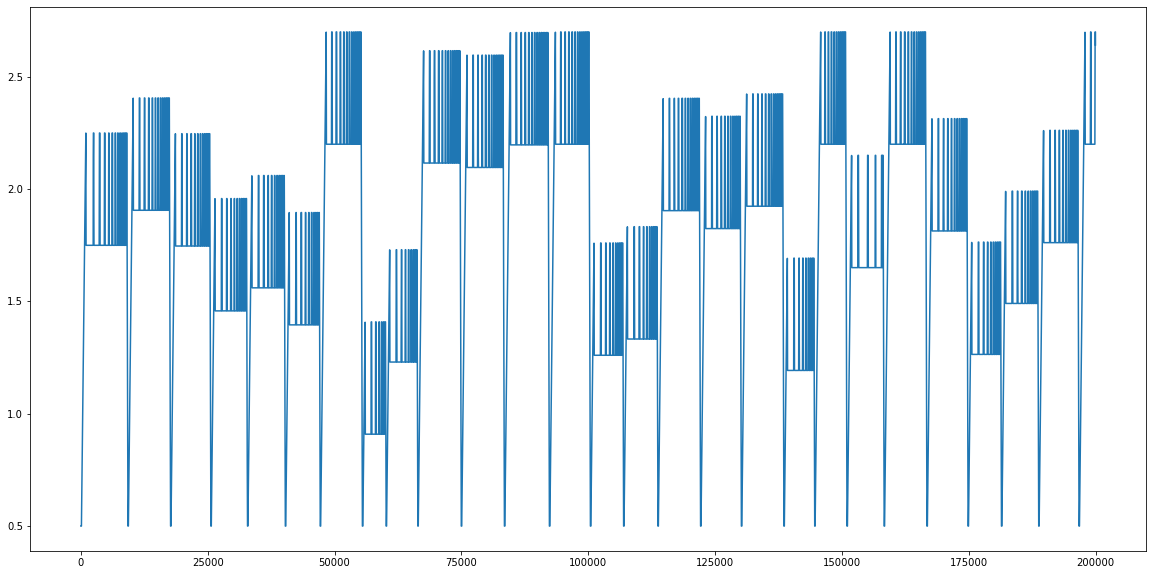

In [20]:
df1["RT_level"].plot(figsize=(20,10))

<AxesSubplot:>

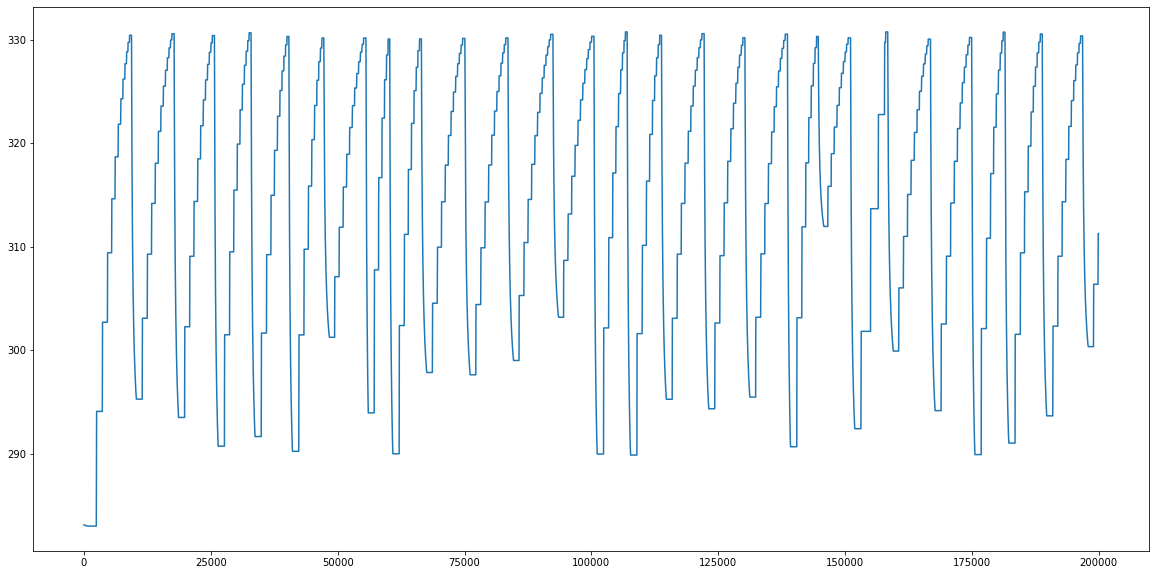

In [21]:
df1["RT_temperature.T"].plot(figsize=(20,10))

<AxesSubplot:>

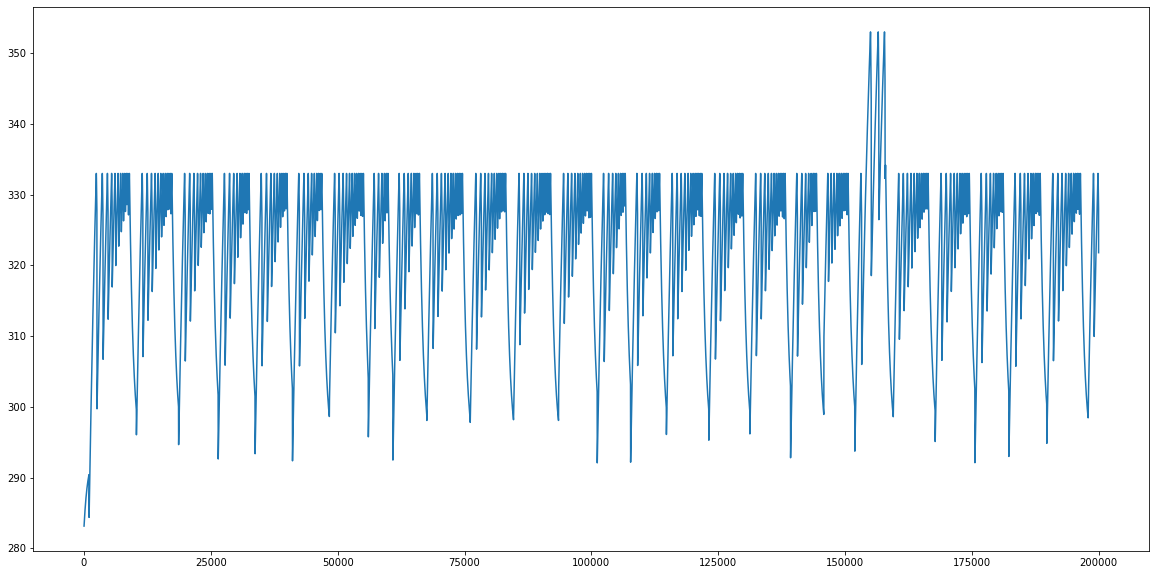

In [22]:
df1["HT_temperature.T"].plot(figsize=(20,10))

<AxesSubplot:>

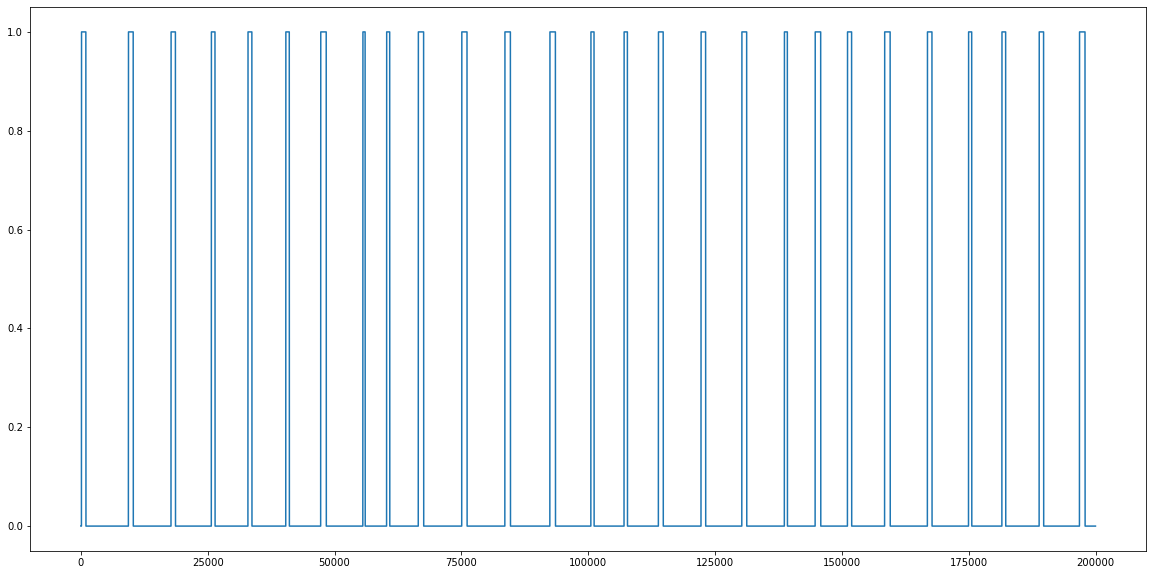

In [23]:
df1["inj_valve_act"].plot(figsize=(20,10))

<AxesSubplot:>

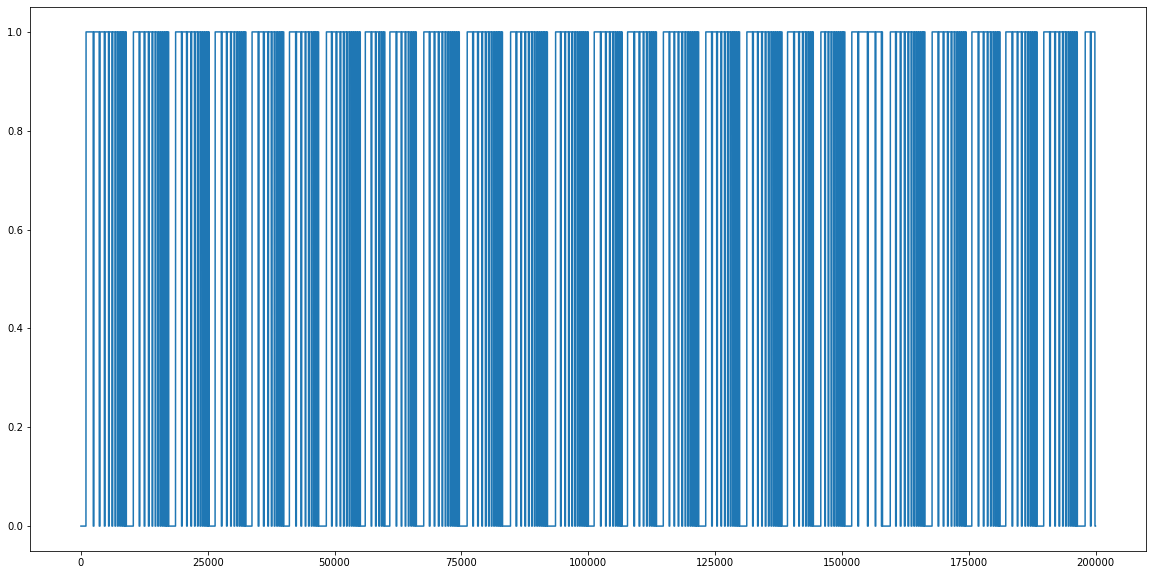

In [24]:
df1["heater_act"].plot(figsize=(20,10))

In [17]:
df1["ATTACK"].value_counts()

0.0    196399
1.0      3582
Name: ATTACK, dtype: int64

In [18]:
df_att = df1[df1["ATTACK"] == 1.0]

In [19]:
df_att

,Time,RT_level_ini,DANGER,FAULT,RT_temperature.T,HT_temperature.T,RT_level,out_valve_act,dT_rand,inv_valve_act,...,boundary.m_flow_in,dir_valve_act,dt_rand,C_level,C_temperature.T,heater_act,HT_level,ATTACK,limiter1.y,dL_rand
153985,1970-01-02 09:46:25,2.150586,0.0,0.0,301.834229,328.286469,1.650586,0.0,-0.198828,0.0,...,0.0,0.0,1.349284,1.386225,329.950134,1.0,0.6,1.0,113.492844,-0.198828
153986,1970-01-02 09:46:26,2.150586,0.0,0.0,301.834229,328.314697,1.650586,0.0,-0.198828,0.0,...,0.0,0.0,1.349284,1.386225,329.950134,1.0,0.6,1.0,113.492844,-0.198828
153987,1970-01-02 09:46:27,2.150586,0.0,0.0,301.834229,328.342957,1.650586,0.0,-0.198828,0.0,...,0.0,0.0,1.349284,1.386225,329.950134,1.0,0.6,1.0,113.492844,-0.198828
153988,1970-01-02 09:46:28,2.150586,0.0,0.0,301.834229,328.371185,1.650586,0.0,-0.198828,0.0,...,0.0,0.0,1.349284,1.386225,329.950134,1.0,0.6,1.0,113.492844,-0.198828
153989,1970-01-02 09:46:29,2.150586,0.0,0.0,301.834229,328.399414,1.650586,0.0,-0.198828,0.0,...,0.0,0.0,1.349284,1.386225,329.950134,1.0,0.6,1.0,113.492844,-0.198828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157978,1970-01-02 10:52:58,2.150586,1.0,0.0,329.740173,334.059601,1.650586,0.0,-0.198828,0.0,...,0.0,0.0,-2.016388,1.386225,329.950134,1.0,0.6,1.0,79.836113,-0.198828
157979,1970-01-02 10:52:59,2.150586,1.0,0.0,329.740173,334.085938,1.650586,0.0,-0.198828,0.0,...,0.0,0.0,-2.016388,1.386225,329.950134,1.0,0.6,1.0,79.836113,-0.198828
157980,1970-01-02 10:53:00,2.150586,1.0,0.0,329.740173,334.112244,1.650586,0.0,-0.198828,0.0,...,0.0,0.0,-2.016388,1.386225,329.950134,1.0,0.6,1.0,79.836113,-0.198828
157981,1970-01-02 10:53:01,2.150586,1.0,0.0,329.740173,334.138550,1.650586,0.0,-0.198828,0.0,...,0.0,0.0,-2.016388,1.386225,329.950134,1.0,0.6,1.0,79.836113,-0.198828


In [20]:
attack = list(df_att["Time"])

In [21]:
list1 = df_att.index

In [22]:
df_danger = df1[df1["DANGER"] == 1.0]

In [23]:
list2= df_danger.index

#### Визуализация аномалий

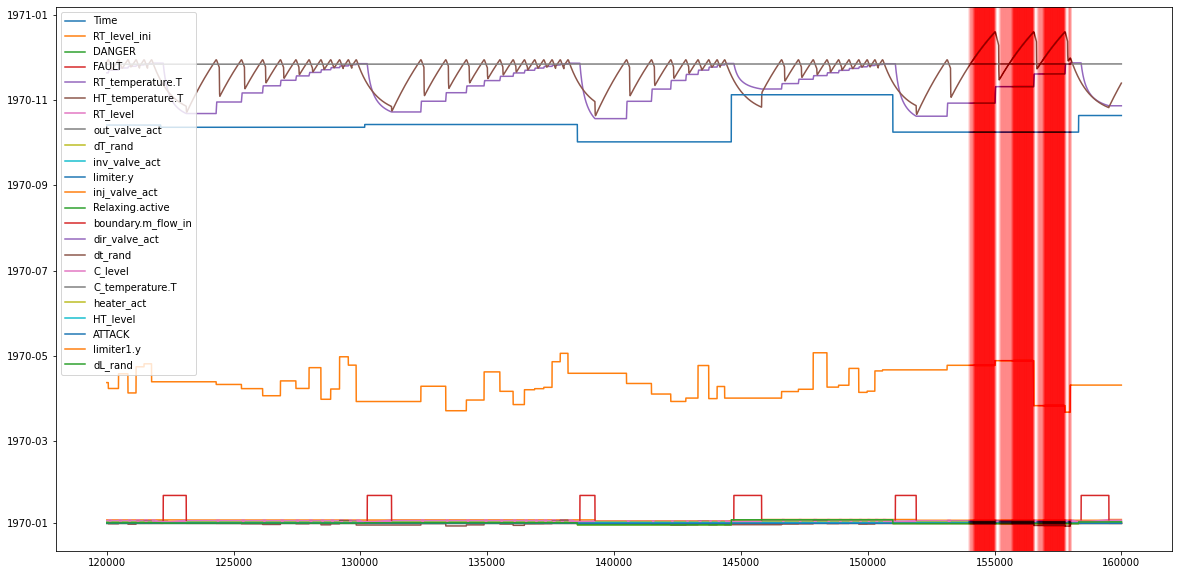

In [24]:
df1[120000:160000].plot(figsize=(20,10))
list1 = df_att.index
for xc in list1:
    plt.axvline(x=xc, ls='-', color = "r", lw=3, alpha=0.005)
for xc in list2:
    plt.axvline(x=xc, ls='-', color = "r", lw=3, alpha=0.002)     
plt.legend(loc='upper left')    
plt.show()

Аномалии связанные с изменение максимального уровня жидкости приемного бака (RT)

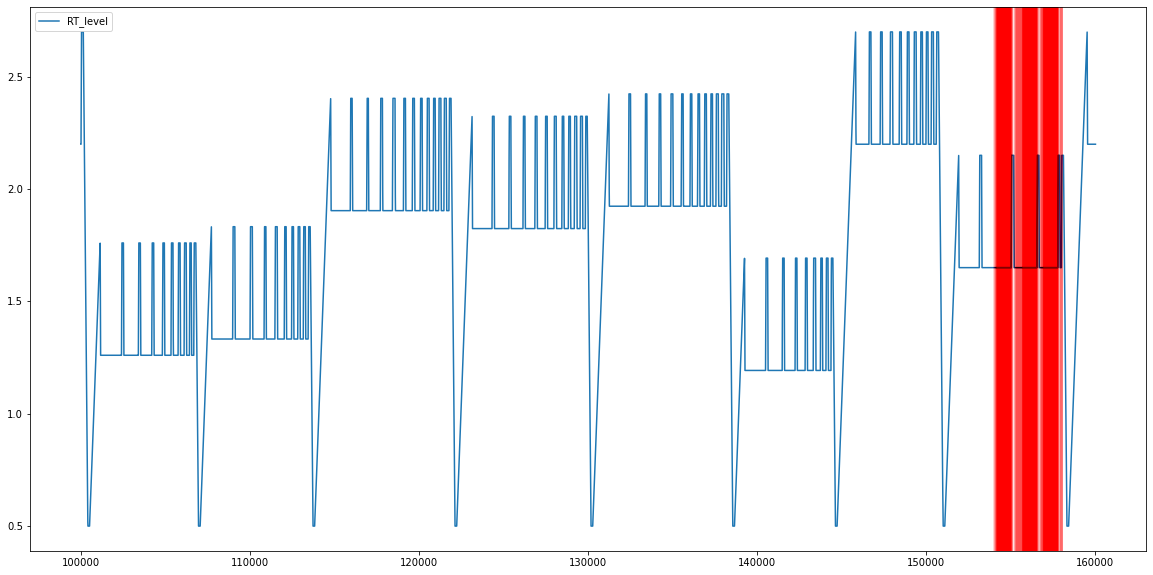

In [33]:
df1["RT_level"][100000:160000].plot(figsize=(20,10))
list1 = df_att.index
for xc in list1:
    plt.axvline(x=xc, ls='-',color = "r", lw=3, alpha=0.003)
for xc in list2:
    plt.axvline(x=xc, ls='-', color = "r", lw=3, alpha=0.007)    
plt.legend(loc='upper left')    
plt.show()

Аномалии связанные с изменением максимальной температуры нагревательного бака (HT)

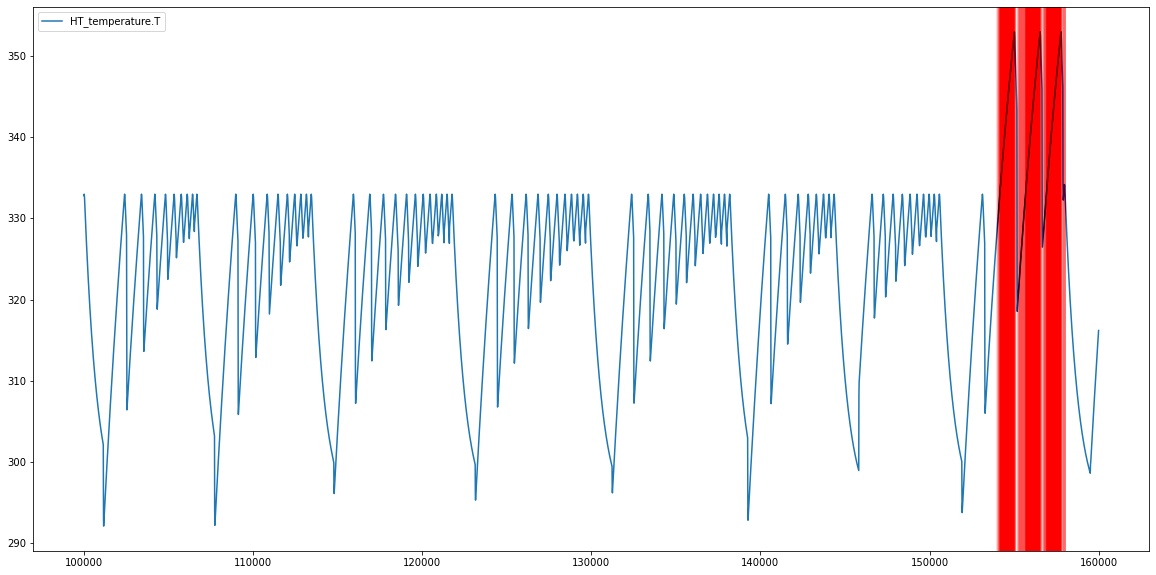

In [34]:
df1["HT_temperature.T"][100000:160000].plot(figsize=(20,10))
list1 = df_att.index
for xc in list1:
    plt.axvline(x=xc, ls='-',color = "r", lw=3, alpha=0.003)
for xc in list2:
    plt.axvline(x=xc, ls='-', color = "r", lw=3, alpha=0.007)    
plt.legend(loc='upper left')    
plt.show()

Аномалии связанные с изменением значения времени простоя системы

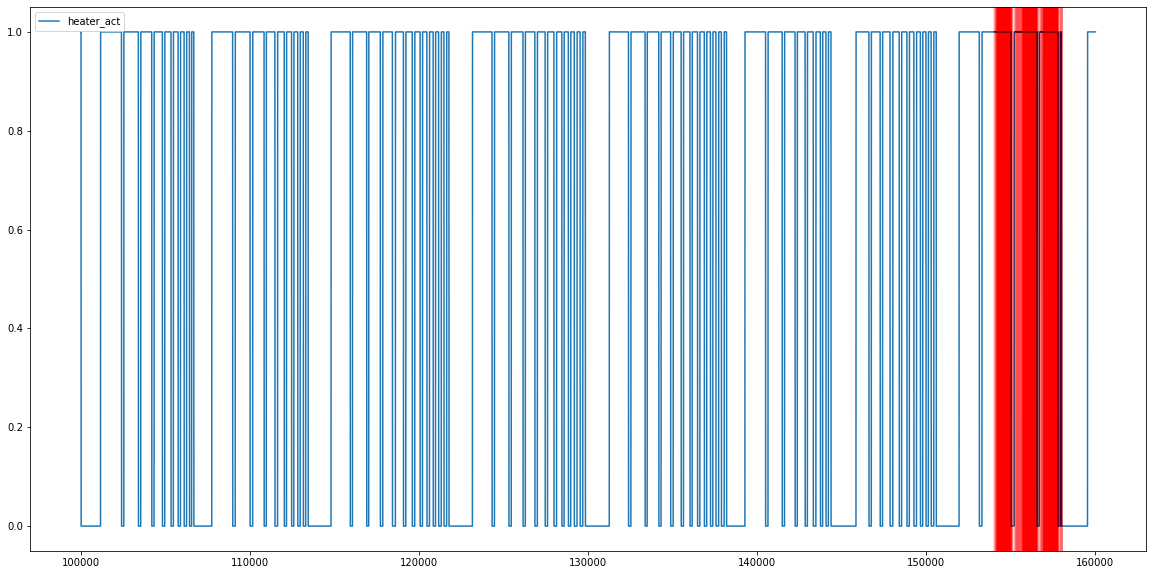

In [35]:
df1["heater_act"][100000:160000].plot(figsize=(20,10))
list1 = df_att.index
for xc in list1:
    plt.axvline(x=xc, ls='-',color = "r", lw=3, alpha=0.002)
for xc in list2:
    plt.axvline(x=xc, ls='-', color = "r", lw=3, alpha=0.007)    
plt.legend(loc='upper left')    
plt.show()

In [28]:
df2 = df1.copy()

### Применим метод из библиотеки ruptures  к данному датасету для оределения точки изменения

In [29]:
!pip install ruptures
import ruptures as rpt

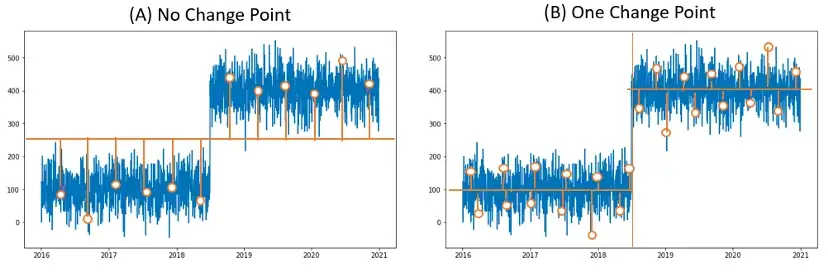

In [30]:
df2 = df2.set_index("Time")

In [31]:
df2 = df2[153500:160000]

В метод fit, необходимо подать сигнал следующей размерности: (n_samples, n_features)

In [32]:
list1=[]
for i in df2.columns:
    list1.append(i)

In [33]:
list2=[]
for i in list1:
    list2.append(df2[i].values)

In [34]:
arr1 = np.vstack(list2).T
print(np.shape(arr1))

(6500, 22)


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
arr = scaler.fit_transform(arr1)

In [36]:
result = rpt.Pelt(model="rbf").fit(arr)
change_location1 = result.predict(pen=10)

In [37]:
change_location1

[485,
 655,
 1470,
 1520,
 1545,
 1660,
 1680,
 2180,
 2995,
 3045,
 3065,
 3150,
 3170,
 3410,
 4225,
 4275,
 4300,
 4380,
 4400,
 4485,
 4505,
 4605,
 4705,
 4810,
 4910,
 5215,
 5605,
 6005,
 6030,
 6500]

In [38]:
change_location1 = change_location1[0]

#### Визуализируем найденную точку изменения

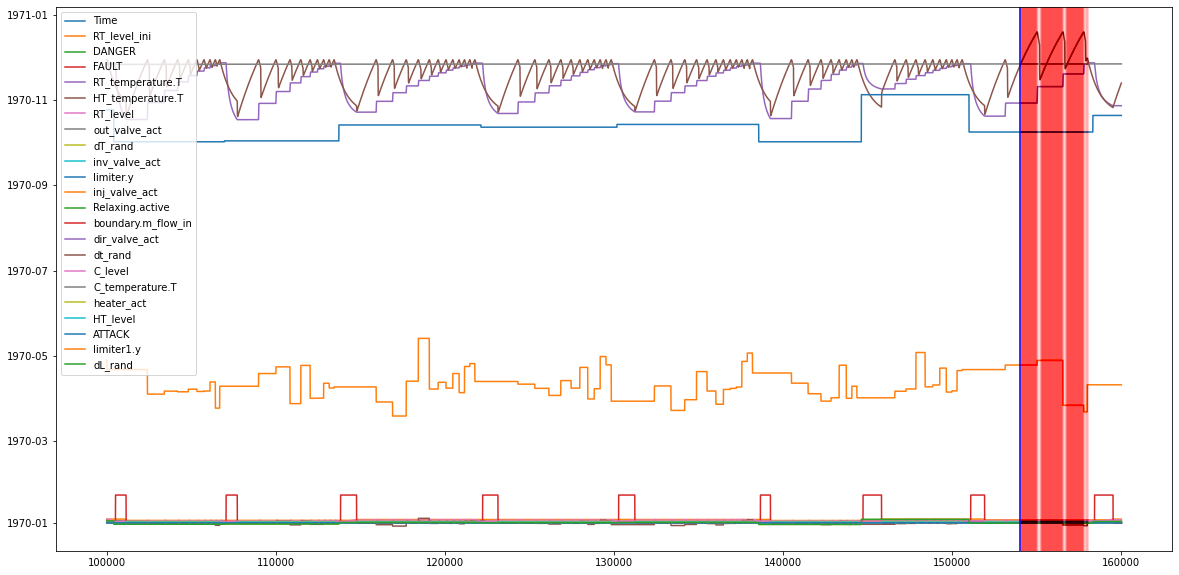

In [40]:
df1[100000:160000].plot(figsize=(20,10))
list1 = df_att.index
for xc in list1:
    plt.axvline(x=xc, ls='-', color = "r", lw=3, alpha=0.005)
plt.axvline(x=(change_location1+153500), color = "b")
plt.legend(loc='upper left')    
plt.show()

#### Сделаем оценку данного метода, для начала подготовим данные

In [209]:
prediction = pd.Series(0,pd.date_range('1970-01-02 09:38:20','1970-01-02 11:26:39',freq='S'))

In [210]:
prediction.iloc[change_location1]=1

Реальная точка изменения будет является первой аномалией

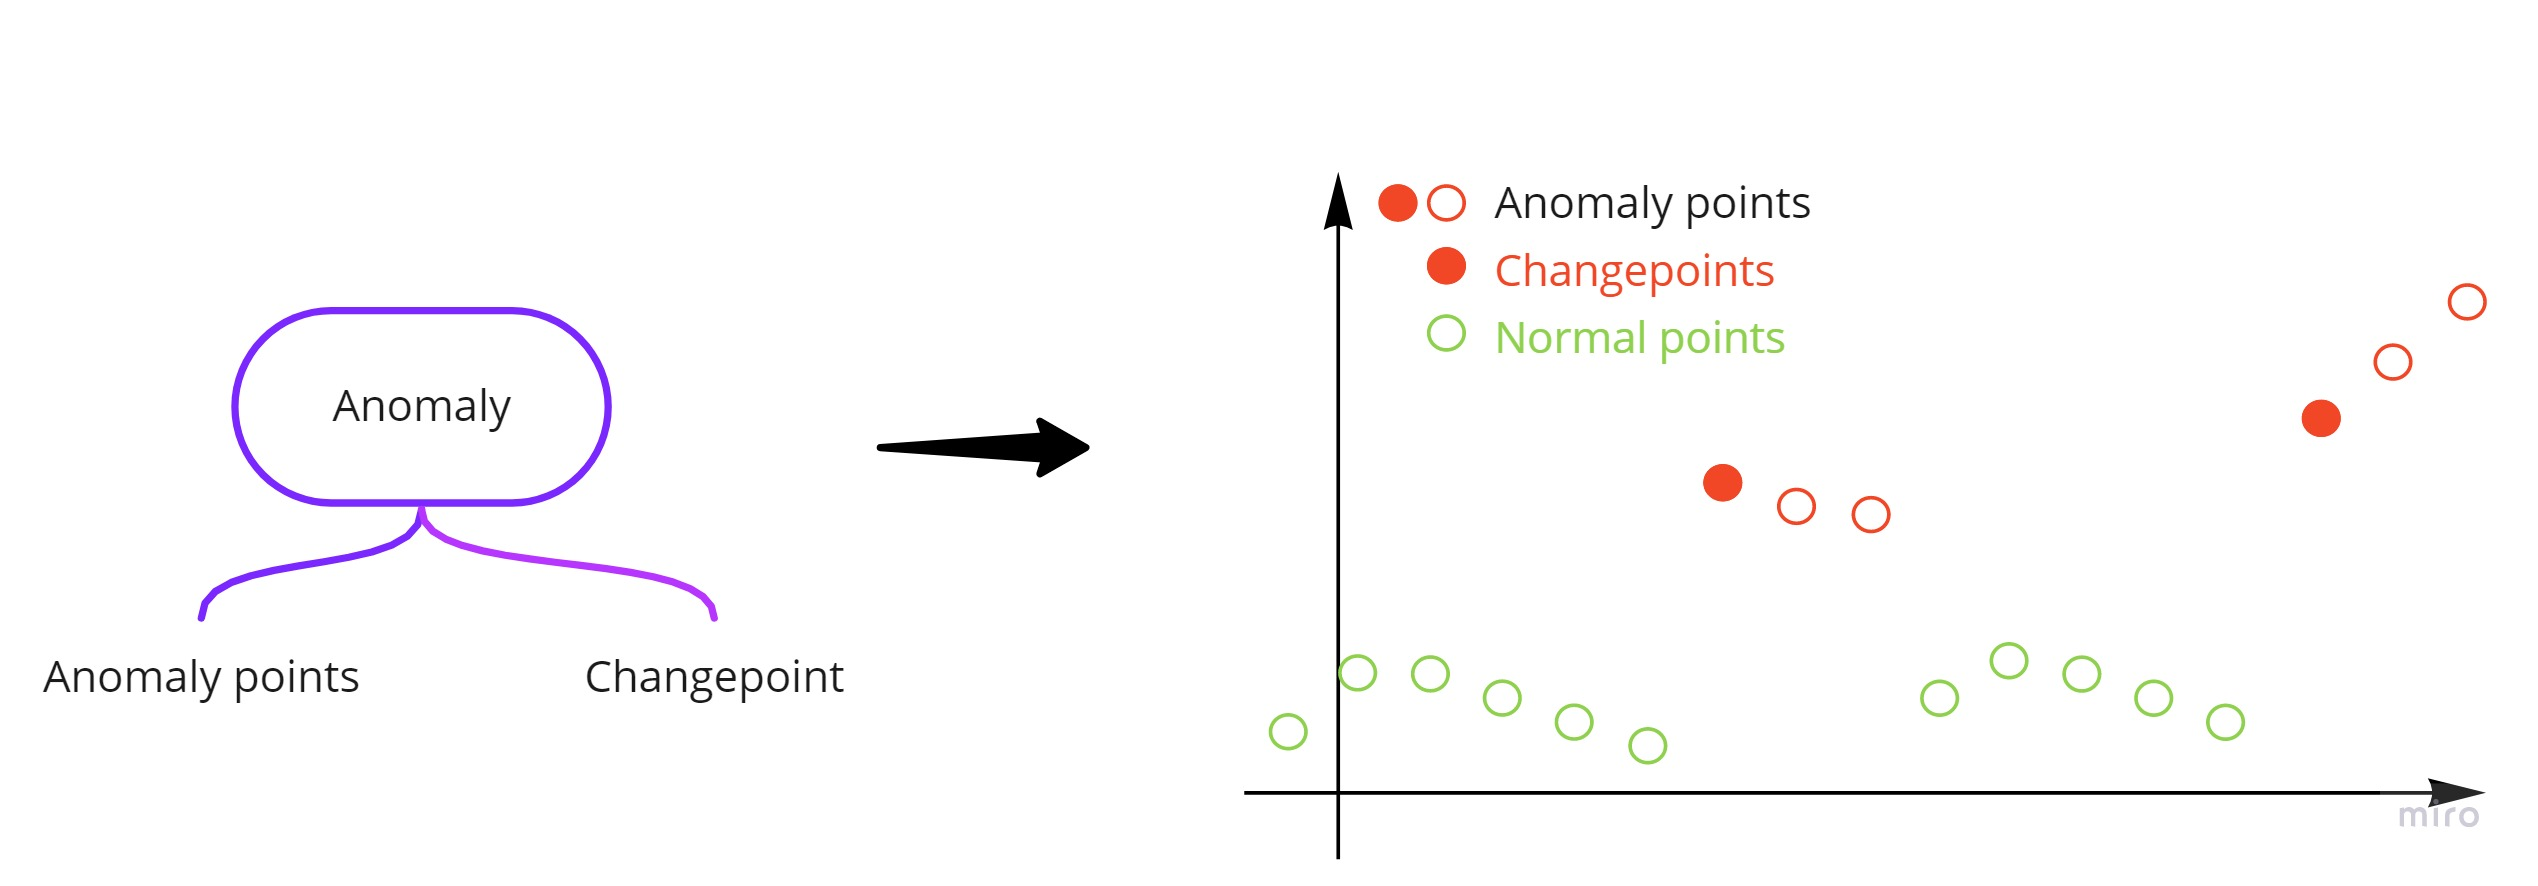


In [211]:
df1 = df1.astype({"ATTACK": "Int64"})

In [212]:
a = df1["ATTACK"] == 1

In [213]:
j=0
for i in a:
    j+=1
    if i == True:
        print(j)
        break

153986


#### Визуализируем реальну и предсказанную точки

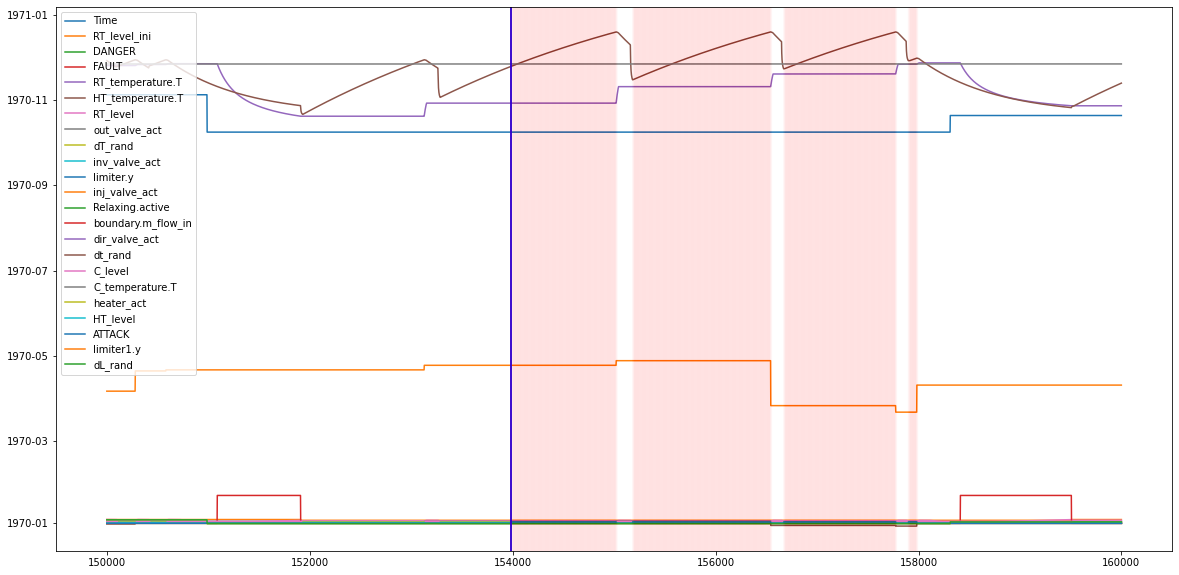

In [231]:
df1[150000:160000].plot(figsize=(20,10))
list1 = df_att.index
for xc in list1:
    plt.axvline(x=xc, ls='-', color = "r", lw=3, alpha=0.005)
# for xc in list2:
#     plt.axvline(x=xc, ls='-', color = "r", lw=3, alpha=0.002)   
plt.axvline(x=(change_location1+153500), color = "r")
plt.axvline(x=j, color = "b")
plt.legend(loc='upper left')    
plt.show()

Видно, что точки совпали

In [215]:
trues = pd.Series(0,pd.date_range('1970-01-02 09:38:20','1970-01-02 11:26:39',freq='S'))

Реальная точка изменения

In [216]:
j1 = abs(153500 -j)
j1

486

In [217]:
trues.iloc[j1]=1
trues.value_counts()

0    6499
1       1
dtype: int64

In [218]:
df3 = pd.concat([trues,prediction],1, keys=["true", "pred"]).reset_index()
df3

C:\Users\PC\AppData\Local\Temp\ipykernel_6876\2546325399.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df3 = pd.concat([trues,prediction],1, keys=["true", "pred"]).reset_index()


,index,true,pred
0,1970-01-02 09:38:20,0,0
1,1970-01-02 09:38:21,0,0
2,1970-01-02 09:38:22,0,0
3,1970-01-02 09:38:23,0,0
4,1970-01-02 09:38:24,0,0
...,...,...,...
6495,1970-01-02 11:26:35,0,0
6496,1970-01-02 11:26:36,0,0
6497,1970-01-02 11:26:37,0,0
6498,1970-01-02 11:26:38,0,0


In [219]:
df3.rename(columns={'index': 'time'}, inplace=True)

In [220]:
df3[df3["true"] == 1]

,time,true,pred
486,1970-01-02 09:46:26,1,0


In [221]:
df3[df3["pred"] == 1]

,time,true,pred
485,1970-01-02 09:46:25,0,1


Уже сейчас видно, что точки отстают на 1 секунду

#### Сделаем оценку

#### MAE

In [222]:
import datetime as dt
today = dt.date.today()

def maerror(df):
    # Получаем оценку насколько в среднем предсказанная точка изменения (аномалия) близка к действительной
    time_true = 0
    time_pred = 0
    
    for i in range(len(df["true"])-1):

        if df['true'][i] == 1 and df["pred"][i] != 1:
            time_true = dt.datetime.strptime(str(df["time"][i]), '%Y-%m-%d %H:%M:%S').time()
            num = i
            while df["pred"][num] != 1:
                num +=1
                if df["pred"][num] == 1:
                    time_pred = dt.datetime.strptime(str(df["time"][num]), '%Y-%m-%d %H:%M:%S').time()
    
        if df['true'][i] != 1 and df["pred"][i] == 1:
            time_pred = dt.datetime.strptime(str(df["time"][i]), '%Y-%m-%d %H:%M:%S').time()
            num = i
            while df["true"][num] != 1:
                num +=1
                if df["true"][num] == 1:
                    time_true = dt.datetime.strptime(str(df["time"][num]), '%Y-%m-%d %H:%M:%S').time()
                             
        if df['true'][i] == 1 and df["pred"][i] == 1:     
            time_true = dt.datetime.strptime(str(df["time"][i]), '%Y-%m-%d %H:%M:%S').time() 
            time_pred = dt.datetime.strptime(str(df["time"][i]), '%Y-%m-%d %H:%M:%S').time()
                          
        if time_true != 0 and time_pred != 0:        
        #находим разницу между реальным и предсказанным значением
            if time_true > time_pred:
                duration = -1*(dt.datetime.combine(today, time_pred) - dt.datetime.combine(today, time_true))
            else: 
                duration = dt.datetime.combine(today, time_pred) - dt.datetime.combine(today, time_true)
            # рассчитываем MAE (нормируем по числу аномальных точек)
            mae = np.sum(duration)/(len(df[df["pred"] == 1]))
            
            return print("MAE: {}". format(mae))

In [223]:
maerror(df3)

MAE: 0:00:01


Отставание реальной точки изменения от предсказанной составляет 1 секунду

#### Nab

In [224]:
import tsad
from tsad.evaluating.evaluating import evaluating

In [225]:
df3.set_index('time', inplace=True)
df3.head()

,true,pred
time,,
1970-01-02 09:38:20,0,0
1970-01-02 09:38:21,0,0
1970-01-02 09:38:22,0,0
1970-01-02 09:38:23,0,0
1970-01-02 09:38:24,0,0


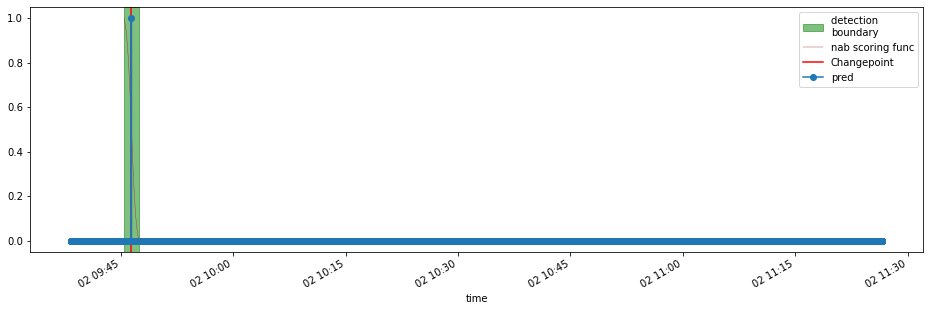

Standart  -  73.06
LowFP  -  70.39
LowFN  -  82.04


In [226]:
numenta_time = "2min" # размер окна
results = evaluating(true=df3["true"],prediction=df3["pred"], 
                     numenta_time=numenta_time, #Размер окна (10% от всего ряда, деленное на число реальных аномалий)
                     anomaly_window_destenation='center', # Расположение окна относительно аномалии
                     metric='nab', clear_anomalies_mode=True,plot_figure=True)
# Результат:
# Standart - назначает TPs, FPs и FNs с относительными весами (привязанными к размеру окна)
# случайные обнаружения, сделанные в 10% случаев, получат в среднем нулевую итоговую оценку
# LowFP и LowFN - начисляют большие штрафы за FPs и FNs, предназначены для иллюстрации поведения алгоритма.

Красные линии-это реальные точки изменения (аномалии), синие - предсказанные.


Зеленым цветом показанно окно, в которое попадают предсказанные точки изменения